# Introduction
Higher education institutions aim to prepare students for successful careers and contribute highly qualified professionals to society. However, challenges exist, with only 33.7% of individuals aged 25 and above in the U.S. holding a bachelor's degree or higher (US Census Bureau, 2022). Student dropout rates, a significant issue, impact over half of enrolled students (Kantrowitz, 2021). Timely intervention for at-risk students and the use of machine learning models can enhance success. In this analysis, using a Kaggle dataset by Kancharla Naveen Kumar, I'll explore factors influencing student success and employ machine learning models like Logistic Regression to predict potential dropouts.


## Date & Time

In [457]:
from datetime import datetime as dt 
now = dt.now()
print("Analysis on", now.strftime('%Y-%m-%d'), "at", now.strftime('%H:%M %p'))

Analysis on 2023-11-27 at 18:36 PM


## Import Libraries

Importing the following standard libraries to support the analysis. Sklearn libraries will be imported when new models are introduced.

In [458]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
# Used to ignore warning messages about future deprecations and improve readability
warnings.filterwarnings('ignore') 

# About the Data

## Description

This dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. The problem is formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes.

Data Source: https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success?select=dataset.csv

License: CC0: Public Domain

## Import Data

In [600]:
df = pd.read_csv('/Users/tobias/Downloads/dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.00000,0,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.00000,0,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.00000,0,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.42857,0,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.33333,0,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate


View the dimensions of the data

In [569]:
df.shape

(4424, 35)

The data frame contains 4,424 rows and 35 columns.

# Preprocessing

Renaming column from 'Nacionality' to 'Nationality':

In [601]:
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [602]:
df.rename(columns={'Target': 'Status'}, inplace=True)

In [603]:
df['Status_binary'] = df['Status'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

In [604]:
df['Status_binary'] = df['Status_binary'].astype(bool)

In [605]:
df['Attendance Type'] = df['Daytime/evening attendance'].map({1: 'Daytime', 0: 'Evening'})

## Data Description

Familiarize with basic statistics.

In [579]:
df.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,7.819,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,4.857,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,5.000,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,8.000,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,10.000,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,46.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


View data types.

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

All variables are numeric except for the status variable, which is non-numeric categorical. Will need to convert Status to numeric after exploring the dataset, prior to applying ML models.

## Missing Data

Use .isna() function to search for any missing data prior to analysis.

In [575]:
print(df.isna().sum())
print('Total Missing: ', df.isna().sum().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Duplicates

In [527]:
print('Total Duplicates: ', df.duplicated().sum())

Total Duplicates:  0


There are no duplicate rows.

# Data Exploration

## Distribution by Age

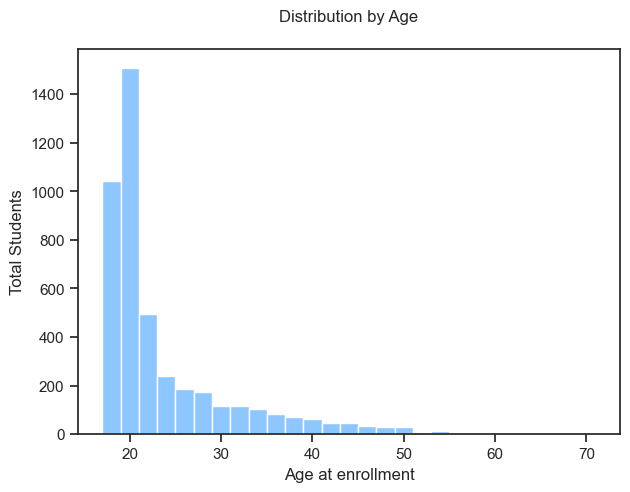

In [551]:
# Create plot
sns.set_style('ticks')
sns.histplot(df, x='Age at enrollment', color='dodgerblue', alpha=0.5, binwidth=2)

# Customize the labels
plt.title('Distribution by Age', pad=20)
plt.ylabel('Total Students')

plt.show()

Most students in the sample population are between the ages of 18-21, consistent with what we would expect with undergraduate enrollment.

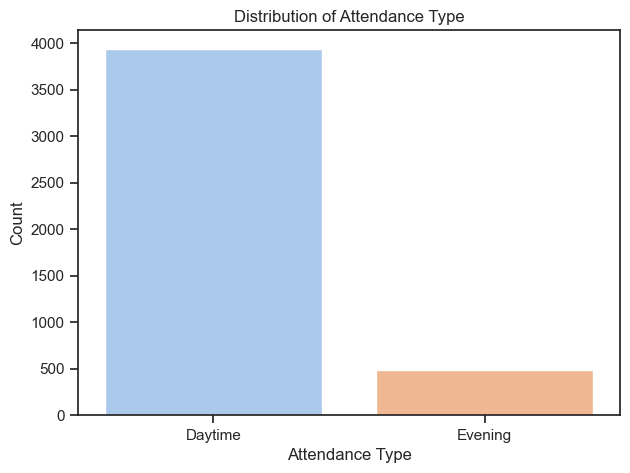

In [581]:
sns.countplot(df, x='Attendance Type', palette='pastel')
plt.title('Distribution of Attendance Type')
plt.xlabel('Attendance Type')
plt.ylabel('Count')

plt.show()

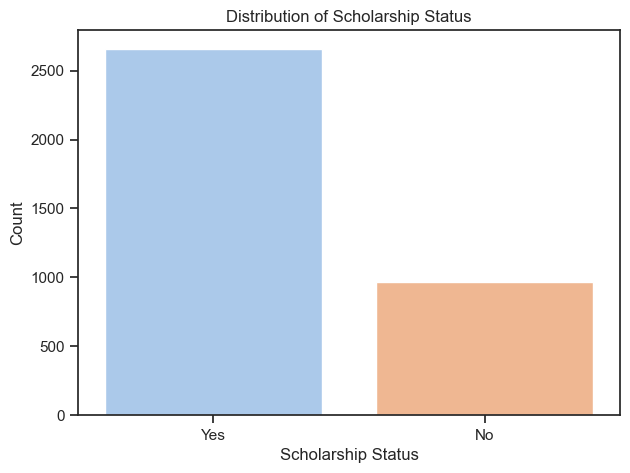

In [591]:
sns.countplot(df, x='Scholarship holder', palette='pastel')
plt.xticks(ticks=[0,1], labels=['Yes', 'No'])
plt.title('Distribution of Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Count')

plt.show()

In [534]:
df['Status'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Status, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

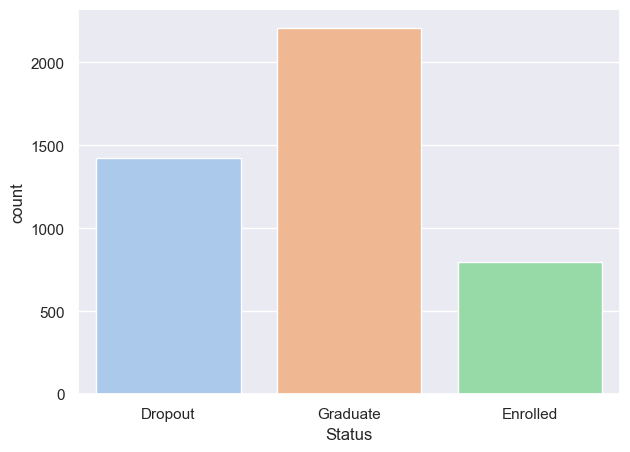

In [442]:
sns.countplot(df, x='Status', palette='pastel')

In [606]:
df = df[df.Status != 'Enrolled']

In [470]:
df.shape

(3630, 36)

## Status Distribution

Next, I will take a look at the current distribution of the target variable with a frequency distribution table and corresponding bar chart. 

In [471]:
# Create data frame containing % of total column
freq_distribution = pd.DataFrame(df['Status'].value_counts())
freq_distribution['% of Total'] = round((freq_distribution['Status'] / df['Status'].value_counts().sum()) * 100, 2)
freq_distribution

,Status,% of Total
Graduate,2209,61
Dropout,1421,39


Approximately 61% of the sample students are labeled as Graduate and 39% are labeled as Dropout.

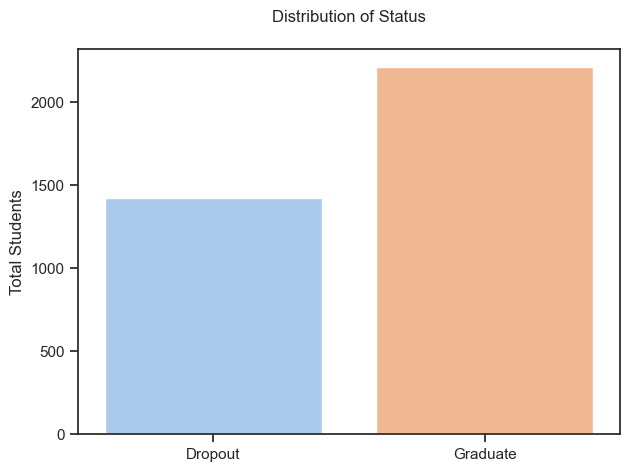

In [167]:
sns.set_style('ticks')
sns.countplot(df, x='Status', palette='pastel')

plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Status', pad=20)

plt.show()

It can be observed that most students graduate relative to dropping out. However, there percentage of students 
that drop out is substantial. This makes it imperative to explore the similar characteristics of these students
to identify areas that needs to be improved to reduce drop out rate and increase graduation rate.

## Distribution of Status by Gender

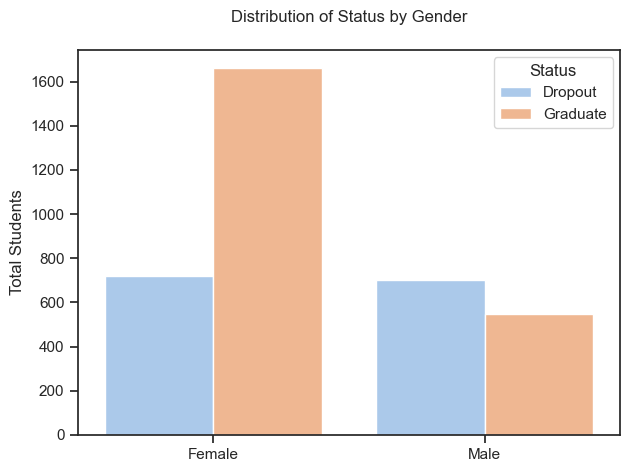

In [584]:
sns.set_style('ticks')
sns.countplot(df, x='Gender', hue='Status', palette='pastel')

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Status by Gender', pad=20)

plt.show()

From the visualization above it can be infered that more males are likely to drop out than females. 
For further drill down, it would be imperative to look into similar characteristics of the males that drop out.

## Distribution by Marital Status

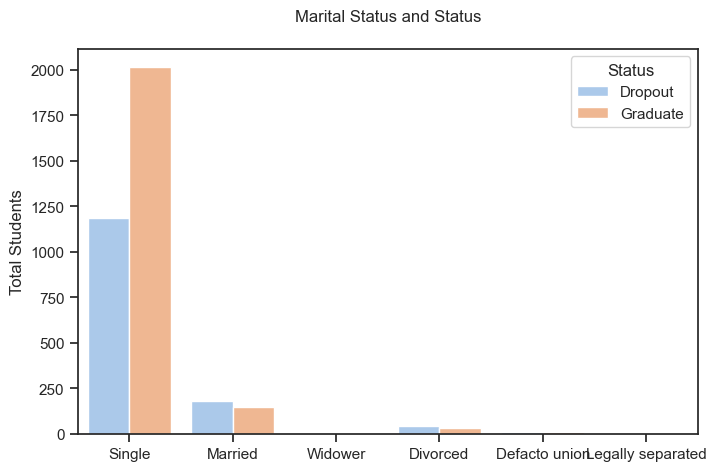

In [592]:
# Create plot
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_style('ticks')
sns.countplot(df, x='Marital status', hue='Status', palette='pastel')

# Change the x tick labels to the corresponding status
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 
                                            'Divorced', 'Defacto union', 'Legally separated'],
                                            rotation=0)
# Customize the labels
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Marital Status and Status', pad=20)

plt.show()

It can be observed that most of the students were single and more of the single students graduated relative to the married students. 
Due to the significant imbalance of marital status leaning toward Single students, marital status is not likely to be a significant influence on overall student success. 

## Distribution of Status  by International/ Non International Students

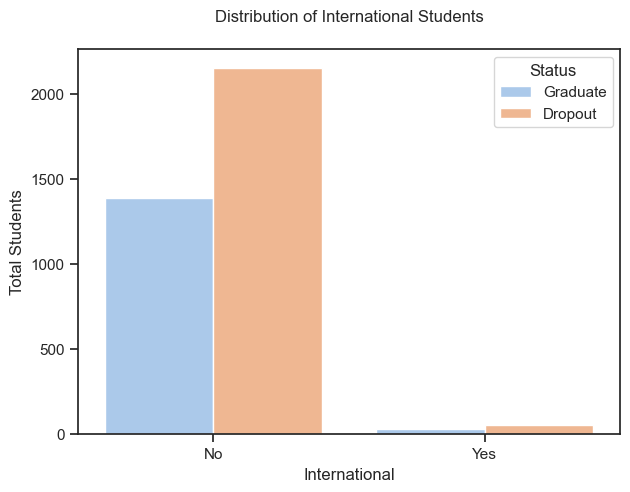

In [585]:
# Create the plot
sns.set_style('ticks')
sns.countplot(df, x='International', hue='Status', palette='pastel')

# Customize the labels
plt.title('Distribution of International Students', pad=20)
plt.ylabel('Total Students')
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.legend(labels=["Graduate", "Dropout"], title='Status', bbox_to_anchor=(1, 1))

plt.show()

It can be observed that most of the students that were in the institution are nationals of the country and few are international students. Also, generally most of the students graduate whether international or not 

## Distribution of Status  by Course Program

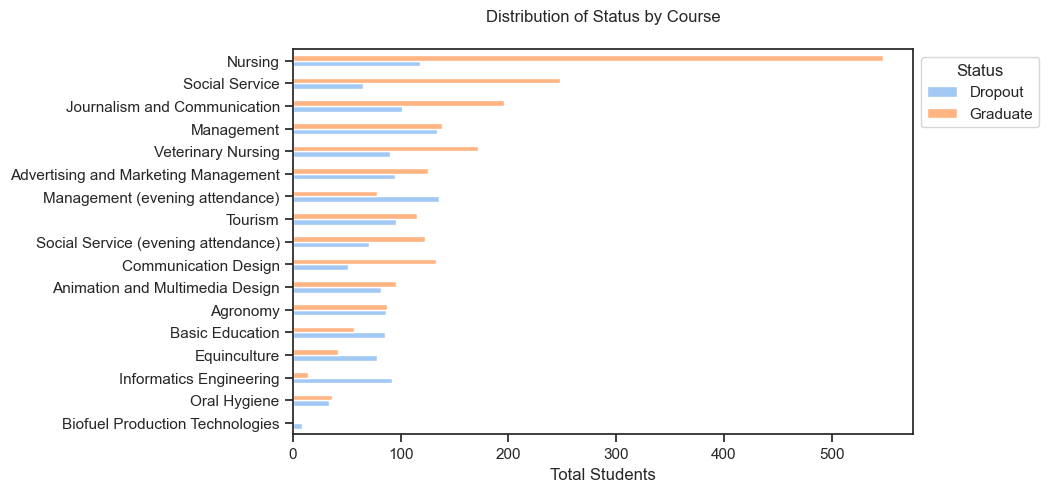

In [593]:
# Group by Course and Target
student_courses = df.groupby(['Course', 'Status']).size().reset_index().pivot(columns='Status', index='Course', values=0)
student_courses = student_courses.rename(index={1: 'Biofuel Production Technologies',
                                                2: 'Animation and Multimedia Design',
                                                3: 'Social Service (evening attendance)',
                                                4: 'Agronomy',
                                                5: 'Communication Design',
                                                6: 'Veterinary Nursing',
                                                7: 'Informatics Engineering',
                                                8: 'Equinculture',
                                                9: 'Management',
                                                10: 'Social Service',
                                                11: 'Tourism',
                                                12: 'Nursing',
                                                13: 'Oral Hygiene',
                                                14: 'Advertising and Marketing Management',
                                                15: 'Journalism and Communication',
                                                16: 'Basic Education',
                                                17: 'Management (evening attendance)'})

# Sum the total number of students for each course and sort for the plot
student_courses['Total'] = student_courses.sum(axis=1)
student_courses_sorted = student_courses.sort_values(by='Total', ascending=True)

# Remove the 'Total' column
student_courses_sorted.drop(columns='Total', inplace=True)

# Generate the plot
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_style('ticks')
sns.set_palette('pastel')
course_plot = student_courses_sorted.plot(kind='barh', stacked=False)

# Customize the labels
plt.title('Distribution of Status by Course', pad=20)
plt.legend(labels=["Dropout", "Graduate"], title='Status', bbox_to_anchor=(1, 1))
plt.xlabel('Total Students')
plt.ylabel(None)

plt.show()


It can be seen that for most of the course programs, students graduate than drop out aside from Management (evening attendance), Basic Education, Equinculture, and Informatics Engineering. 

## Distribution of Drop out by Course Program

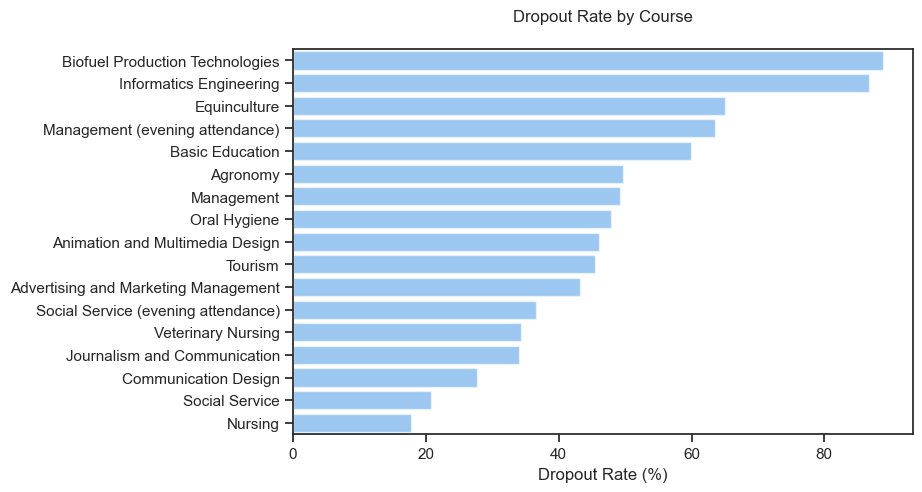

In [103]:
course_names = {1: 'Biofuel Production Technologies',
                                                2: 'Animation and Multimedia Design',
                                                3: 'Social Service (evening attendance)',
                                                4: 'Agronomy',
                                                5: 'Communication Design',
                                                6: 'Veterinary Nursing',
                                                7: 'Informatics Engineering',
                                                8: 'Equinculture',
                                                9: 'Management',
                                                10: 'Social Service',
                                                11: 'Tourism',
                                                12: 'Nursing',
                                                13: 'Oral Hygiene',
                                                14: 'Advertising and Marketing Management',
                                                15: 'Journalism and Communication',
                                                16: 'Basic Education',
                                                17: 'Management (evening attendance)'}
df2 = df.copy()
df2['Course'] = df2['Course'].map(course_names)

# Calculate dropout percentages and sort in descending order
dropout_counts = df2.groupby('Course')['Status'].apply(lambda x: (x == 'Dropout').sum())
total_counts = df2['Course'].value_counts()

dropout_percentages = (dropout_counts / total_counts) * 100
dropout_percentages_sorted = dropout_percentages.sort_values(ascending=False)

# Convert to Data Frame
dropout_rate_df = pd.DataFrame({
    'Course': dropout_percentages_sorted.index,
    'Dropout Rate': dropout_percentages_sorted.values
})

# Visualize in a horizontal bar plot
sns.set_style('ticks')
sns.barplot(dropout_rate_df, x='Dropout Rate', y='Course', 
            color='dodgerblue', alpha=0.5)

# Style the plot
plt.title('Dropout Rate by Course', pad=20)
plt.xlabel('Dropout Rate (%)')
plt.ylabel(None)

plt.show()

It can be seen that Nursing has the lowest drop out rate and Biofuel Production Technology. There are some interesting insights that may indicate some courses are more challenging for students to complete than others. 7 out of 17 courses have over 50% dropout rate.

## Distribution of Status by Time of Attendance

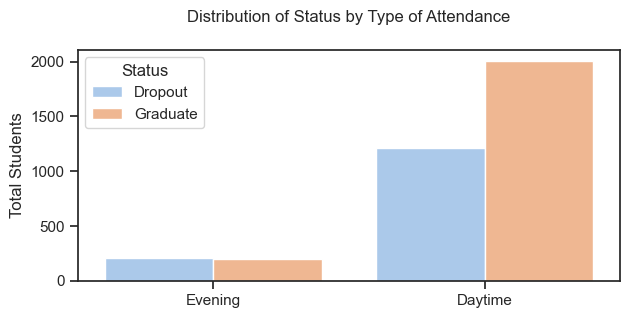

In [608]:
sns.set_style('ticks')
sns.countplot(df, x='Daytime/evening attendance', hue='Status', palette='pastel')

plt.xticks(ticks=[0,1], labels=['Evening', 'Daytime'])
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Status by Type of Attendance', pad=20)

plt.show()

It can be observed that students who attend classes in the Daytime are less likely to drop out and most of the students are evening students. 

## Distribution of Status by Funding Sources 

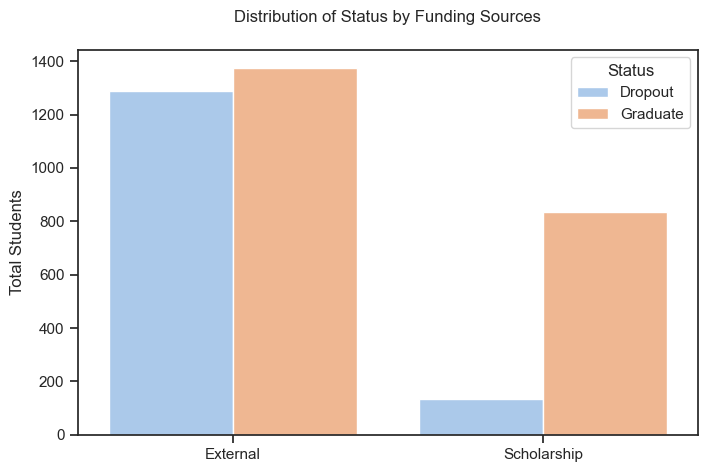

In [114]:
sns.set_style('ticks')
sns.countplot(df, x='Scholarship holder', hue='Status', palette='pastel')

plt.xticks(ticks=[0,1], labels=['External', 'Scholarship'])
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Status by Funding Sources', pad=20)

plt.show()

It can observed that funding status does not significantly affect whether a student drop outs or not. 
However, students with scholarships are less likely to drop out relative to students with external funding

## Distribution of Status by Debt Status

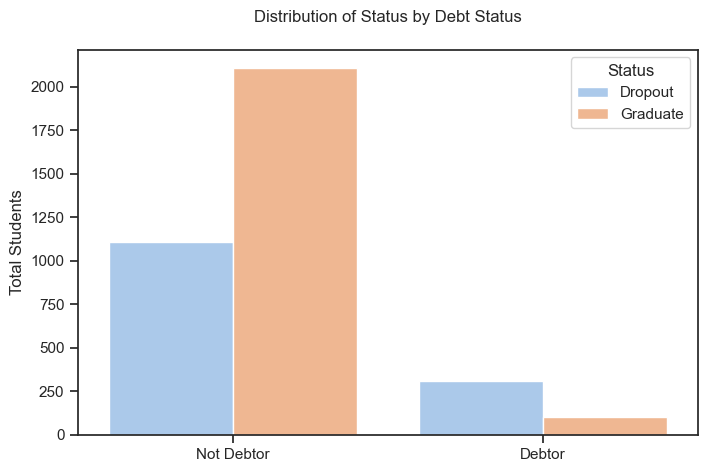

In [115]:
sns.set_style('ticks')
sns.countplot(df, x='Debtor', hue='Status', palette='pastel')

plt.xticks(ticks=[0,1], labels=['Not Debtor', 'Debtor'])
plt.ylabel('Total Students')
plt.xlabel(None)
plt.title('Distribution of Status by Debt Status', pad=20)

plt.show()

The above visulaization show that students who are in debt are more likely to drop out relative to students who 
do not have debt

In [223]:
# Demographic
demographics = df[["Marital status", "Nationality", "Displaced", "Gender", 
                   "Age at enrollment", "International", "Status_binary"]]
# Academic
academic_path = df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Status_binary']]

## Demographic Heatmap - Collinearity between Demographic Variables

Text(0.5, 1.0, 'Demographics Collinearity Heatmap')

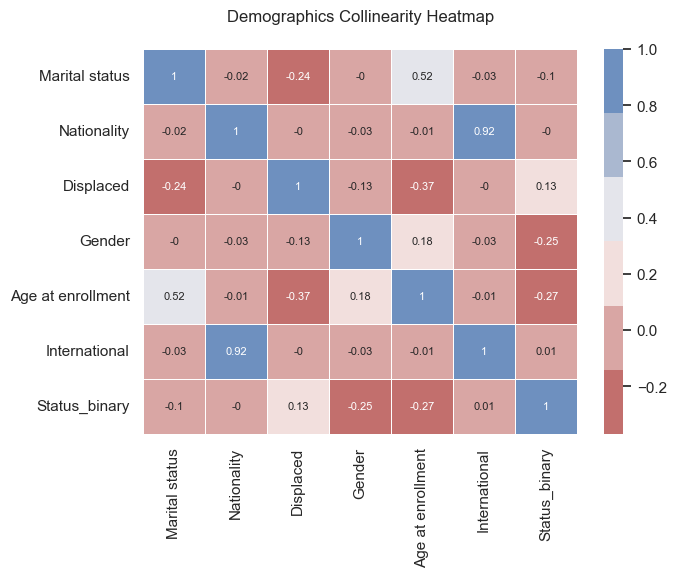

In [224]:
sns.set(rc={"figure.figsize": (7, 5)})
sns.heatmap(demographics.corr().round(2), linewidths=0.5,
            annot=True, annot_kws={"size": 8},
            cmap=sns.color_palette("vlag_r"))

plt.title('Demographics Collinearity Heatmap', pad=20)

From the correlation analysis aboive, it can be found that Gender and Age has the highest correlation with whether a student drop out or graduate. Specifically, it states that students with high age of enrollment are less likely to graduate. In terms of age, it states that males are less likely to graduate 

## Academic Heatmap - Collinearity between Academic Variables

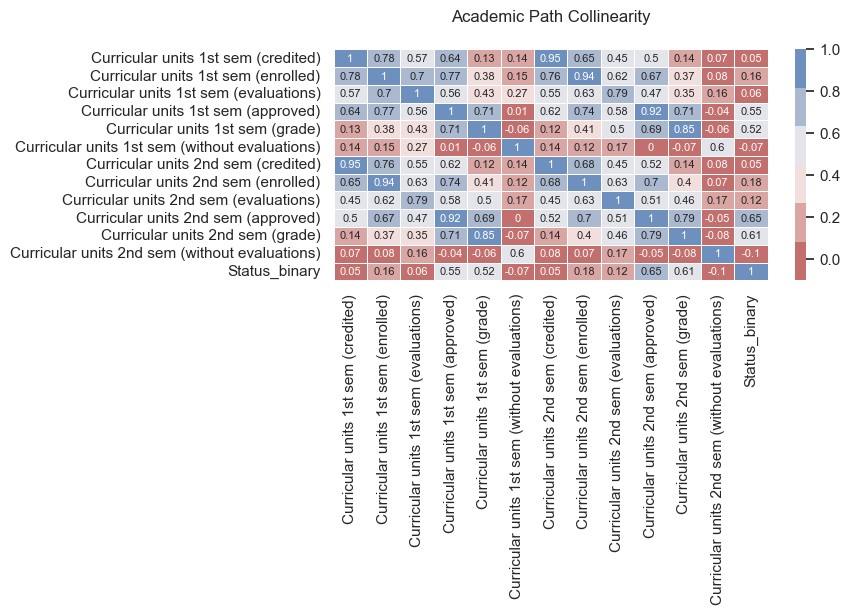

In [595]:
# Create the plot
sns.set(rc={"figure.figsize": (7, 3)})
sns.heatmap(academic_path.corr().round(2), linewidths=0.5,
            annot=True, annot_kws={"size": 8},
            cmap=sns.color_palette("vlag_r"))
# Customize the labels
plt.title('Academic Path Collinearity', pad=20)

plt.show()

In terms of academics, second semester grade has the highest correlation with whether a student drop out or graduates

# Feature Selection

## Transform the Target variable

In [596]:
features_to_drop = ['Nationality', 'International', 'Status']
features_to_drop

['Nationality', 'International', 'Status']

In [597]:
features_to_drop.extend(['Curricular units 1st sem (credited)', 
                           'Curricular units 1st sem (enrolled)',
                           'Curricular units 1st sem (evaluations)', 
                           'Curricular units 1st sem (approved)',
                           'Curricular units 1st sem (grade)', 
                           'Curricular units 1st sem (without evaluations)',
                           'Curricular units 2nd sem (credited)',
                           'Curricular units 2nd sem (without evaluations)']
)
features_to_drop

['Nationality',
 'International',
 'Status',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (without evaluations)']

## Drop Features

In [598]:
df.drop(features_to_drop, axis=1, inplace=True)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Status_binary,Attendance Type
0,1,8,5,2,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0.00000,10.8,1.4,1.74,False,Daytime
1,1,6,1,11,1,1,1,3,4,4,1,0,0,0,1,0,19,6,6,6,13.66667,13.9,-0.3,0.79,True,Daytime
2,1,1,5,5,1,1,22,27,10,10,1,0,0,0,1,0,19,6,0,0,0.00000,10.8,1.4,1.74,False,Daytime
3,1,8,2,15,1,1,23,27,6,4,1,0,0,1,0,0,20,6,10,5,12.40000,9.4,-0.8,-3.12,True,Daytime
4,2,12,1,3,0,1,22,28,10,10,0,0,0,1,0,0,45,6,6,6,13.00000,13.9,-0.3,0.79,True,Evening


Check each remaining variable's correlation with the target variable.

In [481]:
df.corr()['Status_binary']

Marital status                           -0.10048
Application mode                         -0.23389
Application order                         0.09435
Course                                    0.00681
Daytime/evening attendance                0.08450
Previous qualification                   -0.10279
Mother's qualification                   -0.04846
Father's qualification                   -0.00385
Mother's occupation                       0.06420
Father's occupation                       0.07324
Displaced                                 0.12611
Educational special needs                -0.00725
Debtor                                   -0.26721
Tuition fees up to date                   0.44214
Gender                                   -0.25195
Scholarship holder                        0.31302
Age at enrollment                        -0.26723
Curricular units 2nd sem (enrolled)       0.18290
Curricular units 2nd sem (evaluations)    0.11924
Curricular units 2nd sem (approved)       0.65400


Since computational time is not an issue, and collinearity is at a minimum, I will leave the remaining features in the analysis.

# Logistic Regression

## Scale the Data

Access the solution algorithm and instantiate as mm_scaler.

In [482]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()

Fit the scaler to the predictor variables.

In [483]:
X_scaled = mm_scaler.fit_transform(df)

View the scaled data frame.

In [484]:
df[df.columns] = X_scaled
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Status_binary
0,0.0,0.41176,0.83333,0.0625,1.0,0.0,0.42857,0.27273,0.16129,0.20000,1.0,0.0,0.0,1.0,1.0,0.0,0.05660,0.00000,0.00000,0.00,0.00000,0.37209,0.48889,0.76618,0.0
1,0.0,0.29412,0.16667,0.6250,1.0,0.0,0.00000,0.06061,0.09677,0.06667,1.0,0.0,0.0,0.0,1.0,0.0,0.03774,0.26087,0.18182,0.30,0.73590,0.73256,0.11111,0.64069,1.0
2,0.0,0.00000,0.83333,0.2500,1.0,0.0,0.75000,0.78788,0.29032,0.20000,1.0,0.0,0.0,0.0,1.0,0.0,0.03774,0.26087,0.00000,0.00,0.00000,0.37209,0.48889,0.76618,0.0
3,0.0,0.41176,0.33333,0.8750,1.0,0.0,0.78571,0.78788,0.16129,0.06667,1.0,0.0,0.0,1.0,0.0,0.0,0.05660,0.26087,0.30303,0.25,0.66769,0.20930,0.00000,0.12417,1.0
4,0.2,0.64706,0.16667,0.1250,0.0,0.0,0.75000,0.81818,0.29032,0.20000,0.0,0.0,0.0,1.0,0.0,0.0,0.52830,0.26087,0.18182,0.30,0.70000,0.73256,0.11111,0.64069,1.0


## Create Feature and Target Data Structures

In [485]:
X = df.drop('Status_binary', axis=1)
y = df['Status_binary']

Check the shape of the X data structure.

In [486]:
X.shape

(3630, 24)

Verify structure types.

In [487]:
print("X: ", type(X))
print("y: ", type(y))

X:  <class 'pandas.core.frame.DataFrame'>
y:  <class 'pandas.core.series.Series'>


## Fit Model With One Hold-Out Sample

Split the data into train and testing data using sklearn. Save 30% of the data for testing, and stratify the target variable to keep equal proportions in each group.

In [488]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,
                                                    stratify=df['Status_binary'],
                                                    random_state=1)

Check that the stratify parameter worked by maintaining the same balance in the train/test data sets as the original data frame:

In [492]:
X_train = X_train.astype(int)
X_test=X_test.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

In [493]:
y_train.value_counts()

1    1546
0     995
Name: Status_binary, dtype: int64

In [494]:
y_test.value_counts()

1    663
0    426
Name: Status_binary, dtype: int64

In [495]:
print("size of X data structures: ", X_train.shape, X_test.shape)
print("size of y data structures: ", y_train.shape, y_test.shape)

size of X data structures:  (2541, 24) (1089, 24)
size of y data structures:  (2541,) (1089,)


Check the proportion of target variable in the training and testing data.

In [496]:
print("Proportion of Target in the training data: ", round(995/(995+1546), 3))
print("Proportion of Target in the testing data: ", round(426/(426+663), 3))

Proportion of Target in the training data:  0.392
Proportion of Target in the testing data:  0.391


The data were split as expected.

## Access Solution Algorithm & Fit Model

In [497]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)

Fit the model to the training data.

In [505]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Show the intercept and coefficients to examine strengths of each feature variable.

In [506]:
print("intercept %.3f" % logistic_model.intercept_, "\n")
cf = pd.DataFrame()
cf['Feature'] = X.columns
cf['Coef'] = np.transpose(logistic_model.coef_).round(3)
cf.sort_values(by='Coef', ascending=False)

intercept -2.300 



,Feature,Coef
13,Tuition fees up to date,3.094
15,Scholarship holder,1.389
1,Application mode,0.334
8,Mother's occupation,0.330
18,Curricular units 2nd sem (evaluations),0.260
2,Application order,0.223
10,Displaced,0.196
20,Curricular units 2nd sem (grade),0.182
23,GDP,0.175
17,Curricular units 2nd sem (enrolled),0.143


## Evaluate Fit

In [507]:
y_fit = logistic_model.predict(X_train)
y_pred = logistic_model.predict(X_test)

Check the probilities of the positive outcomes (Dropout) and combine with the predicted values to quickly assess the model's predictions.

In [508]:
probs = [i[1] for i in logistic_model.predict_proba(X_test)]
pred_df = pd.DataFrame({'true_values': y_test,
'pred_values': y_pred,
'pred_probs':probs})

Check accuracy for training and testing data.

In [509]:
from sklearn.metrics import accuracy_score
print('Accuracy for training data: %.3f' % accuracy_score(y_train, y_fit))
print('Accuracy for testing data: %.3f' % accuracy_score(y_test, y_pred))

Accuracy for training data: 0.747
Accuracy for testing data: 0.732


The accuracy is highly similar for both the training and testing data, indicating no overfitting.

### Confusion Matrix

In [510]:
from sklearn.metrics import confusion_matrix
c_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
c_matrix

,0,1
0,212,214
1,78,585


Visualize confusion matrix.

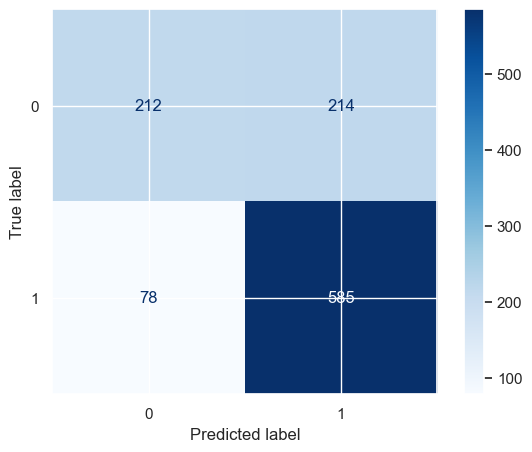

In [511]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [512]:
print("True Negatives: ", c_matrix.iloc[0,0])
print("True Positives: ", c_matrix.iloc[1,1])
print("False Negatives: ", c_matrix.iloc[1,0])
print("False Positives: ", c_matrix.iloc[0,1])

True Negatives:  212
True Positives:  585
False Negatives:  78
False Positives:  214


### Fit Metrics

Calculate accuracy, recall, precision, & F1.

In [513]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Accuracy for testing data: %3f' % accuracy_score(y_test, y_pred))
print ('Recall for testing data: %.3f' % recall_score(y_test, y_pred))
print ('Precision for testing data: %.3f' % precision_score(y_test, y_pred))
print ('F1 for testing data: %.3f' % f1_score(y_test, y_pred))

Accuracy for testing data: 0.731864
Recall for testing data: 0.882
Precision for testing data: 0.732
F1 for testing data: 0.800


Based on the lowest fit index (recall) 84%, the model correctly forecasts almost 84% of Dropouts as Dropout (true positives). So the model mislabels almost 16% of actual Dropouts as Graduates.  

Precision is even higher, which means that of those the model forecasted as Dropout, 91.6% are actual dropouts.
8% of those predicted as Dropout are indicated as Graduate in the data, a false positive.  

By definition, the F1 statistic is between recall and precision, their harmonic average, at 87.6%.

## Baseline Probabilities

View the baseline probabilities to help evaluate the effectiveness of the model.

In [514]:
my = y.mean()
max_my = np.max([y.mean(), 1-y.mean()])
print("proportion of 0\'s (Graduate): %.3f" % (1-my))
print("Proportion of 1\'s (Dropout): %.3f" % my)
print("Null model accuracy: %.3f" % max_my)

proportion of 0's (Graduate): 0.391
Proportion of 1's (Dropout): 0.609
Null model accuracy: 0.609


The Logistic regression model with a single hold-out sample is significantly more accurate than the null model.

## Logistic Model Validation

Next I will evaluate the effectiveness of the model with multiple hold-out samples using K-fold cross-validation.

access solution algorithm and instantiate as skf

In [515]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

The cross_validate() function enables us to obtain multiple evaluation scores from the same cross-validation folds without having to repeat the computations for each score. I will include the training scores to compare with the corresponding testing scores to more easily identify overfitting.

In [516]:
from sklearn.model_selection import cross_validate
scores = cross_validate(logistic_model, X, y, cv=skf,
                        scoring=('accuracy', 'recall', 'precision', 'f1'),
                        return_train_score=True)

logistic_scores = pd.DataFrame(scores).round(3)
logistic_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
0,0.076,0.005,0.901,0.906,0.961,0.957,0.885,0.896,0.922,0.926
1,0.010,0.004,0.904,0.905,0.939,0.957,0.906,0.894,0.922,0.924
2,0.013,0.006,0.906,0.904,0.955,0.958,0.898,0.892,0.925,0.924
3,0.021,0.005,0.893,0.905,0.948,0.956,0.884,0.895,0.915,0.924
4,0.015,0.005,0.894,0.901,0.955,0.950,0.881,0.894,0.916,0.921


Display the mean values for the cross-validation fit metrics.

In [517]:
print('Mean of test accuracy: %.3f' % logistic_scores['test_accuracy'].mean())
print('Mean of test recall: %.3f' % logistic_scores['test_recall'].mean())
print('Mean of test precision: %.3f' % logistic_scores['test_precision'].mean())
print('Mean of test F1: %.3f' % logistic_scores['test_f1'].mean())

Mean of test accuracy: 0.900
Mean of test recall: 0.952
Mean of test precision: 0.891
Mean of test F1: 0.920


The result of the cross-validation with multiple hold-out samples is a slight decrease accuracy and recall, but overall no significant change in the conclusion of a good-fitting model.

<u>Original fit scores:</u>  
Accuracy for testing data: 0.907  
Recall for testing data: 0.840  
Precision for testing data: 0.916  
F1 for testing data: 0.876

Based on the results of this analysis, the logistic regression model accurately predicts 90% of student dropouts and can be used to target communications and allocate resources to help prevent students at risk from dropping out. It is important to note that this dataset is limited to a single university and only two semesters' worth of data, and the results may not generalize to other institutions. In addition,  including student income factors, housing status (on or off campus), grade point average, employment status, and even faculty data, could be added to help improve the accuracy and reliability of the results to produce fewer false negative results. 